In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()

## Data

In [2]:
npz = np.load("FIFA19_data_train.npz")
train_inputs, train_targets = npz["inputs"].astype(np.float), npz["targets"].astype(np.float)

npz = np.load("FIFA19_data_validation.npz")
validation_inputs, validation_targets = npz["inputs"].astype(np.float), npz["targets"].astype(np.float)

npz = np.load("FIFA19_data_test.npz")
test_inputs, test_targets = npz["inputs"].astype(np.float), npz["targets"].astype(float)

## Model

In [3]:
input_size = 328
output_size = 1

hidden_layer_size = 10

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation="relu"),
    tf.keras.layers.Dense(hidden_layer_size, activation="relu"),
    tf.keras.layers.Dense(output_size, activation="linear"),
])

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])

batch_size = 100
max_epochs = 100

early_stopping = tf.keras.callbacks.EarlyStopping(patience=4)

hist = model.fit(train_inputs,
          train_targets,
          batch_size = batch_size,
          epochs = max_epochs,
          callbacks = [early_stopping],
          validation_data = (validation_inputs, validation_targets),
          verbose = 2
          )

Train on 14512 samples, validate on 1814 samples
Epoch 1/100
14512/14512 - 1s - loss: 3965.0013 - mean_absolute_error: 60.9457 - val_loss: 2204.5529 - val_mean_absolute_error: 44.1147
Epoch 2/100
14512/14512 - 0s - loss: 882.2304 - mean_absolute_error: 24.5948 - val_loss: 342.4997 - val_mean_absolute_error: 14.8947
Epoch 3/100
14512/14512 - 0s - loss: 192.9661 - mean_absolute_error: 10.7576 - val_loss: 153.9638 - val_mean_absolute_error: 9.3290
Epoch 4/100
14512/14512 - 0s - loss: 107.0248 - mean_absolute_error: 7.8237 - val_loss: 109.0232 - val_mean_absolute_error: 7.5680
Epoch 5/100
14512/14512 - 0s - loss: 76.0379 - mean_absolute_error: 6.5730 - val_loss: 84.6710 - val_mean_absolute_error: 6.5430
Epoch 6/100
14512/14512 - 0s - loss: 57.9302 - mean_absolute_error: 5.7127 - val_loss: 68.3839 - val_mean_absolute_error: 5.7860
Epoch 7/100
14512/14512 - 0s - loss: 45.9203 - mean_absolute_error: 5.0908 - val_loss: 57.0106 - val_mean_absolute_error: 5.2564
Epoch 8/100
14512/14512 - 0s - lo

Epoch 64/100
14512/14512 - 0s - loss: 4.5691 - mean_absolute_error: 1.6070 - val_loss: 16.5821 - val_mean_absolute_error: 1.9435
Epoch 65/100
14512/14512 - 0s - loss: 4.4902 - mean_absolute_error: 1.5915 - val_loss: 16.2350 - val_mean_absolute_error: 1.9518
Epoch 66/100
14512/14512 - 0s - loss: 4.5044 - mean_absolute_error: 1.5867 - val_loss: 16.9327 - val_mean_absolute_error: 1.9691
Epoch 67/100
14512/14512 - 0s - loss: 4.5156 - mean_absolute_error: 1.5893 - val_loss: 16.2828 - val_mean_absolute_error: 1.9094
Epoch 68/100
14512/14512 - 0s - loss: 4.4518 - mean_absolute_error: 1.5760 - val_loss: 16.5429 - val_mean_absolute_error: 1.9258
Epoch 69/100
14512/14512 - 0s - loss: 4.4236 - mean_absolute_error: 1.5769 - val_loss: 16.1661 - val_mean_absolute_error: 1.9168
Epoch 70/100
14512/14512 - 0s - loss: 4.4166 - mean_absolute_error: 1.5692 - val_loss: 16.5242 - val_mean_absolute_error: 1.9540
Epoch 71/100
14512/14512 - 0s - loss: 4.3599 - mean_absolute_error: 1.5595 - val_loss: 16.5764 - 

Text(0, 0.5, 'Loss')

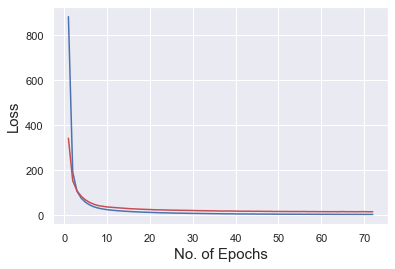

In [4]:
val_loss = hist.history["val_loss"][1:]
loss = hist.history["loss"][1:]
epochs = range(1, len(val_loss)+1)

plt.plot(epochs, loss, color = "b")
plt.plot(epochs, val_loss, color = "r")
plt.xlabel("No. of Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)

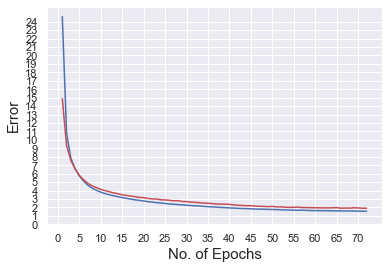

In [5]:
val_error = hist.history["val_mean_absolute_error"][1:]
training_error = hist.history["mean_absolute_error"][1:]
epochs = range(1, len(val_error)+1)

plt.plot(epochs, training_error, color = "b")
plt.plot(epochs, val_error, color = "r")
plt.yticks(np.arange(0, max(training_error), 1))
plt.xticks(np.arange(0, max(epochs)+1, 5))
plt.xlabel("No. of Epochs", fontsize=15)
plt.ylabel("Error", fontsize=15)
plt.show()

## Evaluating the model

In [6]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

1814/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [7]:
print ("Test Loss: {:.2f}, Expected Deviation for Prediction: {:.2f}".format(test_loss, test_accuracy))

Test Loss: 17.92, Expected Deviation for Prediction: 2.00
